In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, roc_curve, r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
print("succesful importing")

succesful importing


In [4]:
path = ('/content/drive/MyDrive/Data_Science /Data_set/aqaba_data_For_ML.csv')
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
print(df.head())

            maxtempC  mintempC  avgtempC  totalprecipMM  windspeedKmph  \
date                                                                     
2008-07-01        40        21        30            0.0             12   
2008-07-02        40        18        28            0.0             12   
2008-07-03        40        15        27            0.0             12   
2008-07-04        38        13        25            0.0             12   
2008-07-05        38        17        27            0.0             15   

            sunhour  weatherCode  humidity  visibilityKm  pressureMB  ...  \
date                                                                  ...   
2008-07-01     13.1          113        37            10        1006  ...   
2008-07-02     13.1          113        37            10        1006  ...   
2008-07-03     13.1          113        43            10        1006  ...   
2008-07-04     13.1          113        43            10        1006  ...   
2008-07-05     13.1

## DATA PREPROCESSING

In [5]:
features = df.drop(['maxtempC','mintempC','avgtempC'],axis = 1)
target = df[['maxtempC']]

scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target).reshape(-1)
#target_scaled_1d = target_scaled.reshape(-1)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

In [6]:
print(target_scaled.shape)
print(target_scaled.ndim)

(4683,)
1


In [7]:
features_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4683 entries, 2008-07-01 to 2021-04-26
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   totalprecipMM      4683 non-null   float64
 1   windspeedKmph      4683 non-null   float64
 2   sunhour            4683 non-null   float64
 3   weatherCode        4683 non-null   float64
 4   humidity           4683 non-null   float64
 5   visibilityKm       4683 non-null   float64
 6   pressureMB         4683 non-null   float64
 7   cloudcover         4683 non-null   float64
 8   DewPointC          4683 non-null   float64
 9   WindGustKmph       4683 non-null   float64
 10  sunrise            4683 non-null   float64
 11  sunset             4683 non-null   float64
 12  moon_illumination  4683 non-null   float64
 13  month              4683 non-null   float64
 14  month_sin          4683 non-null   float64
 15  month_cos          4683 non-null   float64
 16  day   

In [8]:
# Select only the numeric columns you want to visualize as box plots
#y_col = features_scaled.select_dtypes(include=np.number).columns

# Create the box plot with the selected columns
fig = px.box(features_scaled_df,
             title='Temperature and Weather Metrics in Amman from 2008 to 2021')

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
X = features_scaled
y = target_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size=0.2)

In [10]:
models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor(n_estimators=100),
          'Decision Tree': DecisionTreeRegressor(),
          'Support Vector Machine': SVR(),
          'K-Nearest Neighbors': KNeighborsRegressor(),
          'Multi-Layer Perceptron': MLPRegressor(max_iter=500),
          'XGBoost': XGBRegressor(),
          'LightGBM': LGBMRegressor(force_row_wise=True)
          }

result = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    result.append([name, r2, mae, mse, rmse])
    print(f"{name} R2 Score: {r2}")
    print(f"{name} Mean Absolute Error: {mae}")
    print(f"{name} Mean Squared Error: {mse}")
    print(f"{name} Root Mean Squared Error: {rmse}")
    print("___"*40)

Linear Regression R2 Score: 0.9179549566751974
Linear Regression Mean Absolute Error: 0.048222708748476784
Linear Regression Mean Squared Error: 0.003629164846078572
Linear Regression Root Mean Squared Error: 0.060242550129278
________________________________________________________________________________________________________________________
Random Forest R2 Score: 0.9223368932757225
Random Forest Mean Absolute Error: 0.04624707952349361
Random Forest Mean Squared Error: 0.003435335095688726
Random Forest Root Mean Squared Error: 0.05861173172402199
________________________________________________________________________________________________________________________
Decision Tree R2 Score: 0.8298762604914544
Decision Tree Mean Absolute Error: 0.06781274337304222
Decision Tree Mean Squared Error: 0.007525221145458247
Decision Tree Root Mean Squared Error: 0.08674803251635306
___________________________________________________________________________________________________________

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [11]:
result_df = pd.DataFrame(result, columns=['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE'])
best_model = result_df.loc[result_df['R2 Score'].idxmax()]
print(f"The best performing model is {best_model['Model']} with an R2 score of {best_model['R2 Score']}")


The best performing model is LightGBM with an R2 score of 0.9299288855313099


In [12]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



MAE: 1.64
RMSE: 2.06
R² Score: 0.93


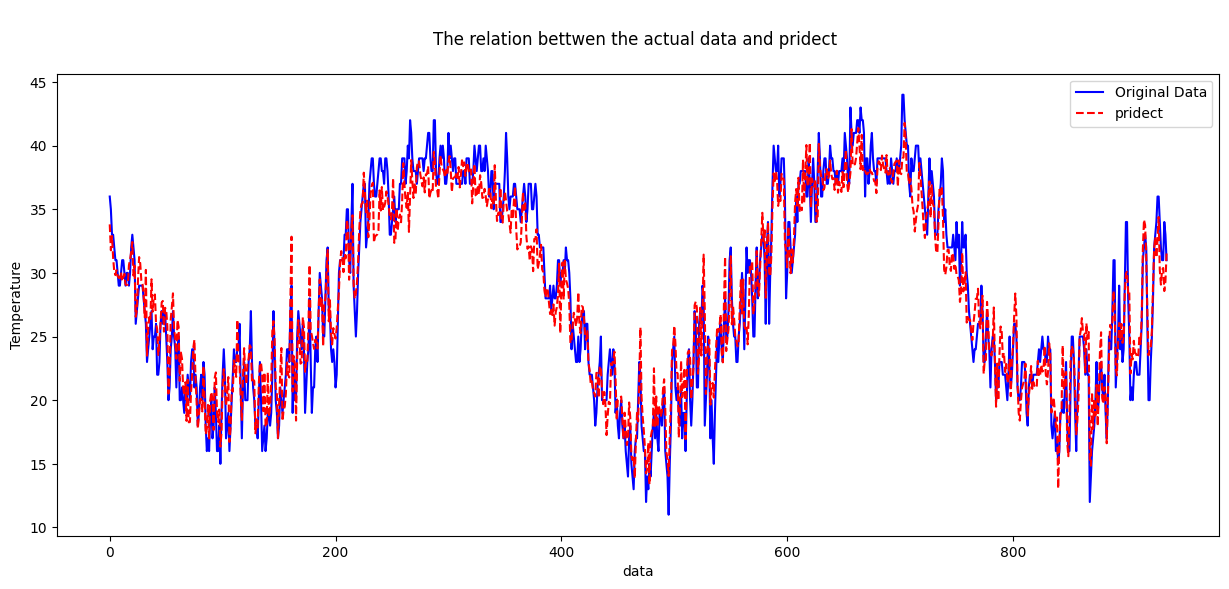

In [13]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Original Data', color='blue')
plt.plot(y_pred, label='pridect', color='red', linestyle='--')
plt.title('\nThe relation bettwen the actual data and pridect \n')
plt.xlabel('data')
plt.ylabel('Temperature')
plt.legend()
plt.show()

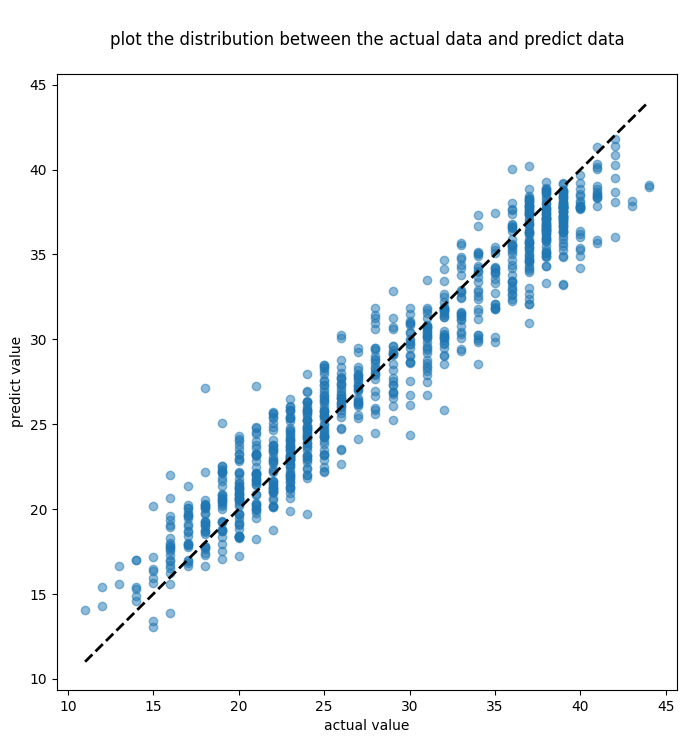

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('\nplot the distribution between the actual data and predict data\n')
plt.xlabel('actual value')
plt.ylabel('predict value')
plt.show()

In [15]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
result.append([name, r2, mae, mse, rmse])

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print("___"*30)

R2 Score: -12.848355151153813
Mean Absolute Error: 27.94285215224515
Mean Squared Error: 838.6021812435621
Root Mean Squared Error: 28.95862878735045
__________________________________________________________________________________________


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [16]:
RF = RandomForestRegressor(n_estimators=100)

RF.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
result.append([name, r2, mae, mse, rmse])

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print("___"*30)

R2 Score: -12.848355151153813
Mean Absolute Error: 27.94285215224515
Mean Squared Error: 838.6021812435621
Root Mean Squared Error: 28.95862878735045
__________________________________________________________________________________________


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [17]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
result.append([name, r2, mae, mse, rmse])

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print("___"*30)

R2 Score: -12.848355151153813
Mean Absolute Error: 27.94285215224515
Mean Squared Error: 838.6021812435621
Root Mean Squared Error: 28.95862878735045
__________________________________________________________________________________________


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [18]:
SVM = SVR()
SVM.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
result.append([name, r2, mae, mse, rmse])

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print("___"*30)

R2 Score: -12.848355151153813
Mean Absolute Error: 27.94285215224515
Mean Squared Error: 838.6021812435621
Root Mean Squared Error: 28.95862878735045
__________________________________________________________________________________________


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [19]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
result.append([name, r2, mae, mse, rmse])

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print("___"*30)

R2 Score: -12.848355151153813
Mean Absolute Error: 27.94285215224515
Mean Squared Error: 838.6021812435621
Root Mean Squared Error: 28.95862878735045
__________________________________________________________________________________________


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [20]:
MLP = MLPRegressor(max_iter=500)
MLP.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
result.append([name, r2, mae, mse, rmse])

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print("___"*30)

R2 Score: -12.848355151153813
Mean Absolute Error: 27.94285215224515
Mean Squared Error: 838.6021812435621
Root Mean Squared Error: 28.95862878735045
__________________________________________________________________________________________


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [21]:
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
result.append([name, r2, mae, mse, rmse])

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print("___"*30)

R2 Score: -12.848355151153813
Mean Absolute Error: 27.94285215224515
Mean Squared Error: 838.6021812435621
Root Mean Squared Error: 28.95862878735045
__________________________________________________________________________________________


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [22]:
LGBM =  LGBMRegressor(force_row_wise=True)
LGBM.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
result.append([name, r2, mae, mse, rmse])

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print("___"*30)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 3746, number of used features: 21
[LightGBM] [Info] Start training from score 0.561803


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



R2 Score: -12.848355151153813
Mean Absolute Error: 27.94285215224515
Mean Squared Error: 838.6021812435621
Root Mean Squared Error: 28.95862878735045
__________________________________________________________________________________________
